<a href="https://colab.research.google.com/github/anchalnagwanshi/DL-assignments/blob/main/mrmr2024009_lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [ ]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    Conv2D(64, (3, 3), activation = 'relu'),
    Conv2D(128, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
model.summary()
init_weights = model.get_weights()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

SGD

In [ ]:
model.set_weights(init_weights)
model.compile(optimizer = SGD(0.01, momentum=0.5), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_SGD5 = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2740 - loss: 2.0065 - val_accuracy: 0.4250 - val_loss: 1.6493
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4383 - loss: 1.5860 - val_accuracy: 0.4691 - val_loss: 1.4781
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5122 - loss: 1.3692 - val_accuracy: 0.5300 - val_loss: 1.3100
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5725 - loss: 1.2083 - val_accuracy: 0.5661 - val_loss: 1.2327
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6215 - loss: 1.0780 - val_accuracy: 0.5818 - val_loss: 1.1964
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6669 - loss: 0.9475 - val_accuracy: 0.6095 - val_loss: 1.1207
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7180 - loss: 0.8098 - val_accuracy: 0.6133 - val_loss: 1.1335
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7652 - loss: 0.6802 - val_a

In [ ]:
model.set_weights(init_weights)
model.compile(optimizer = SGD(0.01, momentum=0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_SGD9 = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3087 - loss: 1.9126 - val_accuracy: 0.4492 - val_loss: 1.4971
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5228 - loss: 1.3396 - val_accuracy: 0.5834 - val_loss: 1.1676
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6346 - loss: 1.0321 - val_accuracy: 0.6260 - val_loss: 1.0654
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7378 - loss: 0.7519 - val_accuracy: 0.6443 - val_loss: 1.0218
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8381 - loss: 0.4759 - val_accuracy: 0.6419 - val_loss: 1.1779
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9171 - loss: 0.2465 - val_accuracy: 0.6429 - val_loss: 1.3140
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9575 - loss: 0.1302 - val_accuracy: 0.6412 - val_loss: 1.6228
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9734 - loss: 0.0816 - val

In [ ]:
model.set_weights(init_weights)
model.compile(optimizer = SGD(0.01, momentum=0.99), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_SGD99 = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1701 - loss: 2.2159 - val_accuracy: 0.2223 - val_loss: 2.0556
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2235 - loss: 2.0422 - val_accuracy: 0.2202 - val_loss: 2.0688
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2125 - loss: 2.1067 - val_accuracy: 0.1655 - val_loss: 2.1686
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2017 - loss: 2.1380 - val_accuracy: 0.2053 - val_loss: 2.1134
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2425 - loss: 2.0469 - val_accuracy: 0.2690 - val_loss: 2.0113
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2803 - loss: 1.9719 - val_accuracy: 0.2855 - val_loss: 1.9498
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2901 - loss: 1.9381 - val_accuracy: 0.2702 - val_loss: 2.0011
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3153 - loss: 1.8668 - val_

NAG

In [ ]:
model.set_weights(init_weights)
model.compile(optimizer = SGD(0.01, momentum=0.5, nesterov=True), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_NAG5 = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2679 - loss: 2.0182 - val_accuracy: 0.3602 - val_loss: 1.7857
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4315 - loss: 1.6101 - val_accuracy: 0.4834 - val_loss: 1.4621
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5058 - loss: 1.3913 - val_accuracy: 0.5366 - val_loss: 1.3027
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5604 - loss: 1.2490 - val_accuracy: 0.5707 - val_loss: 1.2097
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6174 - loss: 1.0905 - val_accuracy: 0.5825 - val_loss: 1.1734
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6658 - loss: 0.9555 - val_accuracy: 0.6098 - val_loss: 1.1167
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7200 - loss: 0.8214 - val_accuracy: 0.6243 - val_loss: 1.1007
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7679 - loss: 0.6716 - val_a

In [ ]:
model.set_weights(init_weights)
model.compile(optimizer = SGD(0.01, momentum=0.9, nesterov=True), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_NAG9 = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3263 - loss: 1.8715 - val_accuracy: 0.5178 - val_loss: 1.3475
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5549 - loss: 1.2510 - val_accuracy: 0.6079 - val_loss: 1.1024
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6681 - loss: 0.9441 - val_accuracy: 0.6397 - val_loss: 1.0316
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7603 - loss: 0.6912 - val_accuracy: 0.6570 - val_loss: 1.0488
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8565 - loss: 0.4148 - val_accuracy: 0.6542 - val_loss: 1.1493
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9281 - loss: 0.2144 - val_accuracy: 0.6496 - val_loss: 1.3657
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9654 - loss: 0.1079 - val_accuracy: 0.6559 - val_loss: 1.4967
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9749 - loss: 0.0755 - val

In [ ]:
model.set_weights(init_weights)
model.compile(optimizer = SGD(0.01, momentum=0.99, nesterov=True), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_NAG99 = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2847 - loss: 1.9532 - val_accuracy: 0.4088 - val_loss: 1.5951
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.4286 - loss: 1.5878 - val_accuracy: 0.4522 - val_loss: 1.5477
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5023 - loss: 1.4090 - val_accuracy: 0.4726 - val_loss: 1.5296
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5424 - loss: 1.3118 - val_accuracy: 0.4586 - val_loss: 1.5776
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5798 - loss: 1.2162 - val_accuracy: 0.4485 - val_loss: 1.6275
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6460 - loss: 1.0280 - val_accuracy: 0.4461 - val_loss: 1.6958
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6707 - loss: 0.9809 - val_accuracy: 0.4530 - val_loss: 1.8259
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6856 - loss: 0.9545 - val_

RMSProp

In [ ]:
model.set_weights(init_weights)
model.compile(optimizer = RMSprop(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_RMS = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3387 - loss: 1.8645 - val_accuracy: 0.5892 - val_loss: 1.1801
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6116 - loss: 1.1144 - val_accuracy: 0.6092 - val_loss: 1.1424
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7208 - loss: 0.8083 - val_accuracy: 0.6490 - val_loss: 1.0282
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8057 - loss: 0.5640 - val_accuracy: 0.6716 - val_loss: 0.9839
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8904 - loss: 0.3250 - val_accuracy: 0.6677 - val_loss: 1.2008
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9426 - loss: 0.1733 - val_accuracy: 0.6628 - val_loss: 1.5984
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9671 - loss: 0.0974 - val_accuracy: 0.6690 - val_loss: 1.8218
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9761 - loss: 0.0718 - val_

Adam

In [ ]:
model.set_weights(init_weights)
model.compile(optimizer = Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_Adam = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3855 - loss: 1.7199 - val_accuracy: 0.5319 - val_loss: 1.3600
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6356 - loss: 1.0330 - val_accuracy: 0.6565 - val_loss: 0.9746
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7403 - loss: 0.7500 - val_accuracy: 0.6544 - val_loss: 1.0129
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8287 - loss: 0.5046 - val_accuracy: 0.6822 - val_loss: 0.9948
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9142 - loss: 0.2586 - val_accuracy: 0.6689 - val_loss: 1.2513
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9597 - loss: 0.1230 - val_accuracy: 0.6653 - val_loss: 1.5707
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9762 - loss: 0.0723 - val_accuracy: 0.6597 - val_loss: 1.8842
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9780 - loss: 0.0675 - val_a

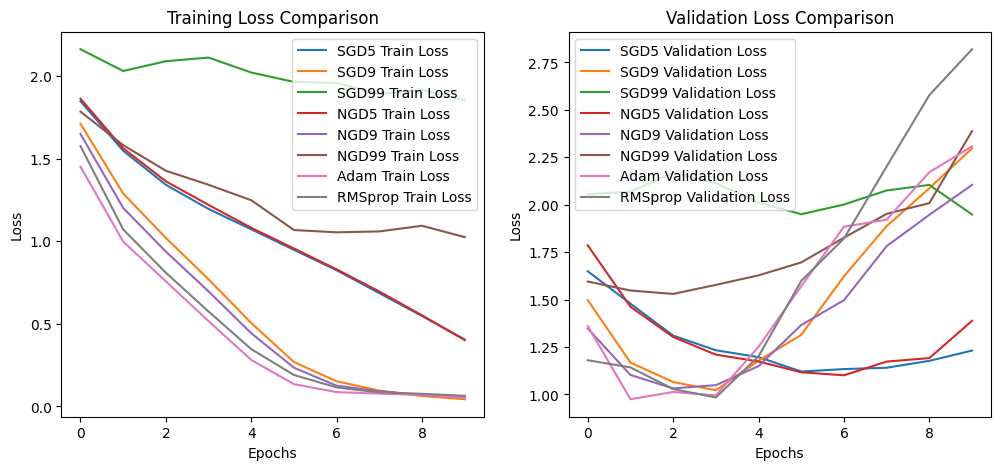

In [ ]:
histories = {"SGD5": history_SGD5,"SGD9": history_SGD9,"SGD99": history_SGD99,"NGD5": history_NAG5,"NGD9": history_NAG9,"NGD99": history_NAG99 , "Adam": history_Adam, "RMSprop": history_RMS}

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for name, history in histories.items():
    plt.plot(history.history['loss'], label=f"{name} Train Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()

plt.subplot(1, 2, 2)
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f"{name} Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss Comparison')
plt.legend()

plt.show()


Question : After training, analyze the gradient updates of each optimizer to compare convergence behavior. Which optimizer converges faster, and which one
generalizes better?

Adam and RMSprop exhibit the fastest convergence, as seen in the rapid decline of training loss. However, RMSprop shows signs of overfitting, with validation loss increasing significantly after a few epochs. SGD5 and SGD9 converge more slowly but maintain relatively stable validation loss, indicating better generalization. NGD99 struggles, showing high and increasing validation loss, making it a less effective choice. Overall, Adam is best for fast convergence, while SGD (especially SGD5 and SGD9) generalizes better, making it a more robust option for avoiding overfitting.

Question: How does increasing momentum impact training stability?

Increasing momentum enhances training stability by smoothing updates and accelerating convergence while reducing oscillations. It helps the optimizer move faster in the right direction by accumulating past gradients, preventing it from getting stuck in local minima. Moderate momentum (e.g., 0.7–0.9) reduces oscillations and stabilizes training, leading to better generalization. However, if momentum is too high (e.g., 0.99), it can cause overshooting, making the training unstable. Finding the right balance is crucial, with 0.9 being a common choice for improved convergence without compromising stability.